### Load GLOVE model

In [ ]:
!wget http://nlp.stanford.edu/data/glove.42B.300d.zip

--2022-11-05 00:00:09--  http://nlp.stanford.edu/data/glove.42B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.42B.300d.zip [following]
--2022-11-05 00:00:09--  https://nlp.stanford.edu/data/glove.42B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip [following]
--2022-11-05 00:00:10--  https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1877800501 (1.7G) [application/zip]


In [ ]:
!unzip glove*.zip

Archive:  glove.42B.300d.zip
  inflating: glove.42B.300d.txt      


### Gensim

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.42B.300d.txt'
word2vec_output_file = 'word2vec.txt'
# The first step is to convert the GloVe file format to the word2vec file format. 
# The only difference is the addition of a small header line. This can be done by calling the 
# glove2word2vec() function.

glove2word2vec(glove_input_file, word2vec_output_file)

In [ ]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)


In [ ]:
vector = model.wv.__getitem__(["word"])
vector


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


array([[-1.3142e-01, -2.7446e-01,  2.3117e-03,  3.8385e-02, -4.4652e-01,
        -5.9866e-02, -3.3413e+00,  5.8563e-01,  4.8697e-02, -8.8974e-02,
         9.9224e-02, -1.8718e-01,  1.6412e-01, -1.9177e-01, -6.0507e-02,
        -9.8204e-03, -2.9133e-02, -1.7755e-01,  2.1721e-01,  3.2681e-01,
        -1.1203e-01, -1.1757e-01,  2.5316e-02,  2.4638e-01,  2.3976e-01,
         3.2587e-02, -1.6208e-01, -2.0086e-01,  3.3976e-01, -8.5481e-01,
        -2.1307e-01, -3.8614e-01,  1.6125e-01,  7.1117e-02, -2.7369e-01,
        -9.6669e-03,  1.7033e-01,  5.0429e-02, -3.0805e-01, -2.9375e-01,
         1.3484e-01,  4.9814e-01, -3.9112e-01,  2.0181e-02,  3.1343e-01,
        -9.3078e-03,  6.5043e-01, -1.4882e-01,  1.7239e-02, -9.7101e-02,
        -2.4606e-02, -3.0464e-01,  3.9072e-01, -1.8133e-01,  8.4682e-02,
         2.6506e-01, -1.8295e-01,  5.4148e-01, -2.4119e-01, -8.1899e-01,
         3.7655e-01, -1.3297e-01,  2.0909e-01, -2.5238e-01, -4.8371e-01,
         2.6553e-01,  2.5481e-01, -2.7843e-03, -4.6

### Paper


In [ ]:
import numpy as np

def loadGloveModel(filepath):
    f = open(filepath,'r')
    model = {}
    for line in f:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    return model

glove_filepath_42B ="glove.42B.300d.txt"

GloVe_Model_42B = loadGloveModel(glove_filepath_42B) # dict w/ words as keys and values as vectors (takes about 3 minutes)



In [ ]:
def glove(input_list):
    """
    Returns 300d GloVe vector corresponding to word(s)
    """
    return [GloVe_Model_42B[word] for word in input_list]

### Generate feature vector


In [ ]:
def get_feature_vector(a, b):
    """
    a: list of length n of words on one end of the feature continuum
    b: list of length m of words on the other end of the continuum

    example:
    get_feature_vector(["small", "little", "tiny"], ["large", "big", "huge"])
    
    """

    # generate list of GloVe embeddings for each end of continuum
    A = glove(a)
    B = glove(b)

    # generate the n x m possible vector differences ("lines") between the two ends
    lines = [] # will be a (n x m, 300) matrix
    for A_i in A:
        for B_j in B:
            lines.append(B_j - A_i)

    # generate the average of the n x m differences
    feature_vector = np.mean(np.array(lines), axis = 0) # shape (300,)
    return feature_vector      

In [ ]:
size = get_feature_vector(["small", "little", "tiny"], ["large", "big", "huge"])
len(size)
size

array([-0.145317  ,  0.226915  ,  0.36772433, -0.29353033,  0.20897   ,
        0.16742333,  0.1472    ,  0.00979   , -0.24802533, -0.06206   ,
        0.313966  ,  0.22800533,  0.44550333,  0.05937861,  0.25701333,
        0.24135033,  0.13660467,  0.17128533, -0.081262  ,  0.03819767,
        0.20666533, -0.26315367,  0.43035133,  0.00140667, -0.00197   ,
       -0.31987077, -0.17070267, -0.16118433, -0.00973113,  0.36155967,
       -0.09408933,  0.28139667,  0.35822733, -0.42700147,  0.14448333,
        0.07060233, -0.006772  ,  0.297923  , -0.1878324 ,  0.02248933,
       -0.093728  ,  0.18374467,  0.34936967, -0.47867933, -0.23660333,
       -0.069911  ,  0.13069673, -0.16353333, -0.413019  ,  0.07320817,
       -0.5495    ,  0.40508933, -0.225095  , -0.24696507,  0.33495133,
       -0.15584   , -0.247724  , -0.02640133, -0.47907333, -0.0508377 ,
       -0.18811513,  0.08385   ,  0.03637333, -0.2118091 ,  0.15180667,
       -0.25014033,  0.07591333,  0.25113   ,  0.3326432 ,  0.03

### Generate vector for each of the ends of the feature vector

In [ ]:
def get_end_vector(a):

  A = glove(a)

  end_vector = np.mean(np.array(A), axis = 0)

  return end_vector

In [ ]:
small = get_end_vector(["small", "little", "tiny"])


### Vector addition

In [ ]:
def VectorAddition(a, b):
  
  c = np.add(a,b)

  return c

def VectorAdditionList(pivot, complement_words):
  pivot = glove(pivot)
  complement_list = glove(complement_words)
  comp_words = []

  for word in complement_list:
    comp_words.append(VectorAddition(pivot, word))
  return comp_words

In [ ]:
types_of_dogs = VectorAdditionList(["dog"],["small", "big"])


### Project words onto feature subspace

In [ ]:
def get_orthogonal_projection(u, v):
    """
    Project vector u on vector v
    """
    projection = (np.dot(u, v)/np.dot(v, v)) * v
    return projection

def get_word_projections(words, feature_set_1, feature_set_2):
    """
    All params are lists of strings 

    example:
    get_word_projection(["mouse", "elephant"],["small", "little", "tiny"], ["large", "big", "huge"])

    """
    # get GloVe embeddings of words
    word_embeddings = glove(words)

    # get feature subspace
    feature_vector = get_feature_vector(feature_set_1, feature_set_2)

    word_projections = [get_orthogonal_projection(word, feature_vector) for word in word_embeddings]

    return word_projections

In [ ]:
mouse_elephant = get_word_projections(["mouse", "elephant"],["small", "little", "tiny"], ["large", "big", "huge"])
print(mouse_elephant)

### Rank words along feature vector

In [ ]:
def get_projection_score(u, v):
    """
    Get a scalar magnitude of u on v
    """
    projection_score = (np.dot(u, v)/np.dot(v, v))
    return projection_score

def get_scores(words, feature_set_1, feature_set_2):
    """
    
    get_scores(["mouse", "elephant"],["small", "little", "tiny"], ["large", "big", "huge"])

    """
    # get GloVe embeddings of words
    word_embeddings = glove(words)

    # get feature subspace
    feature_vector = get_feature_vector(feature_set_1, feature_set_2)

    # get projection scores
    projection_scores = [get_projection_score(word, feature_vector) for word in word_embeddings]

    return projection_scores

### Ranking compound words onto feature subspace

In [ ]:
def GetProjectionScoreSum(u, v):
    """
    Get a scalar magnitude of u on v
    """
    projection_score_sum = (np.dot(u, v)/np.dot(v, v))
    return projection_score_sum[0]

def GetScoreSum(words, feature_set_1, feature_set_2):
    """
    
    get_scores(["mouse", "elephant"],["small", "little", "tiny"], ["large", "big", "huge"])

    """

    # get feature subspace
    feature_vector_sum = get_feature_vector(feature_set_1, feature_set_2)

    # get projection scores
    projection_scores_sum = []
    projection_scores_sum = [GetProjectionScoreSum(word, feature_vector_sum) for word in words]

    return projection_scores_sum



In [ ]:
scores = GetScoreSum(types_of_dogs, ["small", "little", "tiny"], ["large", "big", "huge"])
scores

[-0.3476646489578169, 0.4565722315818102]

### Perform PCA


In [ ]:
def performPCA(words, n):
  # words must be an array of vectors produced with the function GloVe_Model_42B[word]
  from sklearn.decomposition import PCA

  arrays = np.empty((0, 300), dtype='f')
  arrays = np.append(arrays, words, axis=0)

  wordsPCA =  PCA(n_components=n).fit_transform(arrays)
  
  return wordsPCA


In [ ]:
words_PCA = [GloVe_Model_42B["small"],GloVe_Model_42B["tiny"],GloVe_Model_42B["little"], GloVe_Model_42B["huge"], GloVe_Model_42B["big"], GloVe_Model_42B["enormous"]]
palabras = performPCA(words_PCA,2)
palabras

array([[-2.03259605, -0.81128267],
       [-2.47381974, -1.7641459 ],
       [-2.77879315,  1.58303214],
       [ 2.79361086,  0.06028084],
       [ 1.43749024,  2.86366594],
       [ 3.05410784, -1.93155036]])

In [ ]:
#from sklearn.decomposition import PCA


#arrays = np.empty((0, 300), dtype='f')

    # adds the vector of the query word
#arrays = np.append(arrays, [GloVe_Model_42B["mouse"],GloVe_Model_42B["elephant"],GloVe_Model_42B["whale"], GloVe_Model_42B["dog"], GloVe_Model_42B["tiny"], size], axis=0)

#principalComponents =  PCA(n_components=2).fit_transform(arrays)
#principalComponents


### Graph vectors

In [ ]:
def graphVectors(wordsPCA, names):
  # wordsPCA is the output of performPCA function
  # names is an array with the names for the word vectors in the same order as wordsPCA's output.

  import numpy as np
  import matplotlib.pyplot as plt
    
  # The data are given as list of lists (2d list)

  # Taking transpose
  x, y = wordsPCA.T
      
  # plot our list in X,Y coordinates
  plt.scatter(x, y)
  for i, label in enumerate(names):
      plt.annotate(label, (x[i], y[i]))
      
  plt.show()

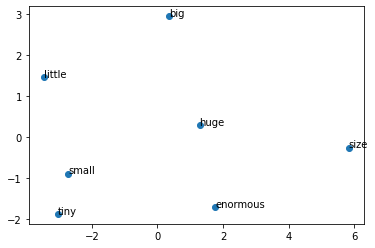

In [ ]:

graphVectors(palabras, ["small", "tiny", "little", "huge", "big", "enormous", "size"] )

# Images

### Hot-cold scale

In [ ]:
# Generate vector for each of the ends of the feature vector

cold = get_end_vector(["cold", "frozen", "icy"])
hot = get_end_vector(["hot", "boiling", "burning"])

# Generate list of words to be evaluated

words = ["fire", "lava", "sun", "wood", "metal", "ice", "snow"]

PCA_words = glove(words)

# Append both ends of the scale to our list
PCA_words.append(cold)
PCA_words.append(hot)

#Perform PCA on list
words_2D = performPCA(PCA_words, 2)



In [ ]:
type(PCA_words)

list

In [ ]:
from sympy.abc import x

X, Y = words_2D.T

#Define coordinates for each end of the scale
x_c, y_c = words_2D[7].T
x_h, y_h = words_2D[8].T

#Data to produce the function
m = (y_h - y_c) / (x_h - x_c)
b = y_c - (m * x_c)
F = (m * x) + b



Plot function that passes through both ends of the scale

In [ ]:
import numpy as np

def plotFunction(F):

  X_axis = np.linspace(-5, 5, 100)
  Y_axis = np.zeros_like(X_axis)

  for i in range(len(X_axis)):
    
    Y_axis[i] = F.subs(x, X_axis[i])

  return X_axis, Y_axis


Function to return query coordinates evaluated in F. Returns array with evaluated Y's.

In [ ]:
def evaluateWords(words_2D, F):

  PCA_words_F = []

  for word in words_2D:
    PCA_words_F.append(F.subs(x, word[0]))

  return PCA_words_F
  

In [ ]:
Y_data_F = evaluateWords(words_2D, F)
Y_data_F

[0.844172746592992,
 -0.581672075876372,
 -0.000535226555458956,
 2.32816033550972,
 2.16049279902587,
 -1.19746276731265,
 -1.03621669206351,
 -0.928321347699914,
 0.163585131427830]

Plot everything

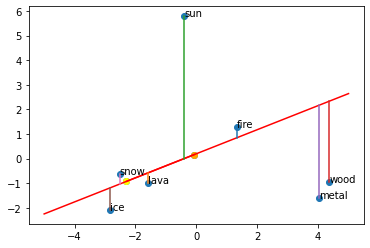

In [ ]:
import matplotlib.pyplot as plt

#Plot words from list
plt.scatter(X, Y)

#Plot labels for words in list
for i, label in enumerate(words):
    plt.annotate(label, (X[i], Y[i]))

#Plot cold end of the scale
plt.scatter(x_c, y_c, color = 'yellow')

#Plot hot end of the scale
plt.scatter(x_h, y_h, color = 'orange')

#Plot line connecting both ends
plt.plot([x_c, x_h], [y_c, y_h], color = 'red')


#Plot function connecting two points
X_data, Y_data = plotFunction(F)
plt.plot(X_data, Y_data,  c ="red" )

#Plot differences between points and scale
for i in range(len(words_2D)):
  plt.plot([X[i], X[i]], [Y[i], Y_data_F[i]] )

plt.savefig('Hot_cold_scale')
plt.show()


### Animal size

In [ ]:
# Generate vector for each of the ends of the feature vector

small = get_end_vector(["small", "tiny", "little"])
big = get_end_vector(["big", "huge", "large"])

# Generate list of words to be evaluated

animals = ["mouse", "hamster", "ant", "dog", "rhino", "elephant", "whale"]
PCA_animals = glove(animals)

# Append both ends of the scale to our list
PCA_animals.append(small)
PCA_animals.append(big)

#Perform PCA on list
animals_2D = performPCA(PCA_animals,2)

In [ ]:
# Define x's and y's for scatter plot
X_animals, Y_animals = animals_2D.T

#Define coordinates for each end of the scale
x_s, y_s = animals_2D[7].T
x_b, y_b = animals_2D[8].T

#Data to produce the function
m_animals = (y_b - y_s) / (x_b - x_s)
b_animals = y_s - (m_animals * x_s)
F_animals = (m_animals * x) + b_animals

# List of Y coordinates evaluated in F
Y_data_F_animals = evaluateWords(animals_2D, F_animals)

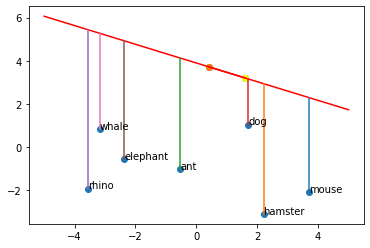

In [ ]:
import matplotlib.pyplot as plt

#Plot words from list
plt.scatter(X_animals, Y_animals)

#Plot labels for words in list
for i, label in enumerate(animals):
    plt.annotate(label, (X_animals[i], Y_animals[i]))

#Plot small end of the scale
plt.scatter(x_s, y_s, color = 'yellow')

#Plot big end of the scale
plt.scatter(x_b, y_b)

#Plot line connecting both ends
plt.plot([x_s, x_b], [y_s, y_b], color = 'red')


#Plot function connecting two points
X_data_animals, Y_data_animals = plotFunction(F_animals)
plt.plot(X_data_animals, Y_data_animals,  c ="red" )

#Plot differences between points and scale
for i in range(len(animals_2D)):
  plt.plot([X_animals[i], X_animals[i]], [Y_animals[i], Y_data_F_animals[i]] )

plt.savefig('animal_size_scale.png')
plt.show()


### Sweet-Sour scale

In [ ]:
# Generate vector for each of the ends of the feature vector

sweet = get_end_vector(["sweet", "sugary", "candied"])
sour = get_end_vector(["acid", "tart", "bitter"])

# Generate list of words to be evaluated

food = ["sugar", "honey", "salt", "lemon", "vinegar", "water", "milk"]
PCA_food = glove(food)

# Append both ends of the scale to our list
PCA_food.append(sweet)
PCA_food.append(sour)

#Perform PCA on list
food_2D = performPCA(PCA_food,2)

In [ ]:
# Define x's and y's for scatter plot
X_food, Y_food = food_2D.T

#Define coordinates for each end of the scale
x_sweet, y_sweet = food_2D[7].T
x_sour, y_sour = food_2D[8].T

#Data to produce the function
m_food = (y_sour - y_sweet) / (x_sour - x_sweet)
b_food = y_sweet - (m_food * x_sweet)
F_food = (m_food * x) + b_food

# List of Y coordinates evaluated in F
Y_data_F_food = evaluateWords(food_2D, F_food)

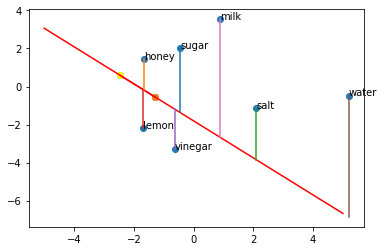

In [ ]:
#Plot words from list
plt.scatter(X_food, Y_food)

#Plot labels for words in list
for i, label in enumerate(food):
    plt.annotate(label, (X_food[i], Y_food[i]))

#Plot small end of the scale
plt.scatter(x_sweet, y_sweet, color = 'yellow')

#Plot big end of the scale
plt.scatter(x_sour, y_sour)

#Plot line connecting both ends
plt.plot([x_sweet, x_sour], [y_sweet, y_sour], color = 'red')


#Plot function connecting two points
X_data_food, Y_data_food = plotFunction(F_food)
plt.plot(X_data_food, Y_data_food,  c ="red" )

#Plot differences between points and scale
for i in range(len(food_2D)):
  plt.plot([X_food[i], X_food[i]], [Y_food[i], Y_data_F_food[i]] )


plt.show()

### Justice-Injustice scale

In [ ]:
# Generate vector for each of the ends of the feature vector

justice = get_end_vector(["justice", "equity", "legal"])
injustice = get_end_vector(["injustice", "inequity", "opression"])

# Generate list of words to be evaluated

words_justice = ["gay", "migrant", "woman", "man", "american", "transexual", "latino"]
PCA_justice = glove(words_justice)

# Append both ends of the scale to our list
PCA_justice.append(justice)
PCA_justice.append(injustice)

#Perform PCA on list
justice_2D = performPCA(PCA_justice,2)

In [ ]:
# Define x's and y's for scatter plot
X_justice, Y_justice = justice_2D.T

#Define coordinates for each end of the scale
x_justice, y_justice = justice_2D[7].T
x_injustice, y_injustice = justice_2D[8].T

#Data to produce the function
m_justice = (y_injustice - y_justice) / (x_injustice - x_justice)
b_justice = y_justice - (m_justice * x_justice)
F_justice = (m_justice * x) + b_justice

# List of Y coordinates evaluated in F
Y_data_F_justice = evaluateWords(justice_2D, F_justice)

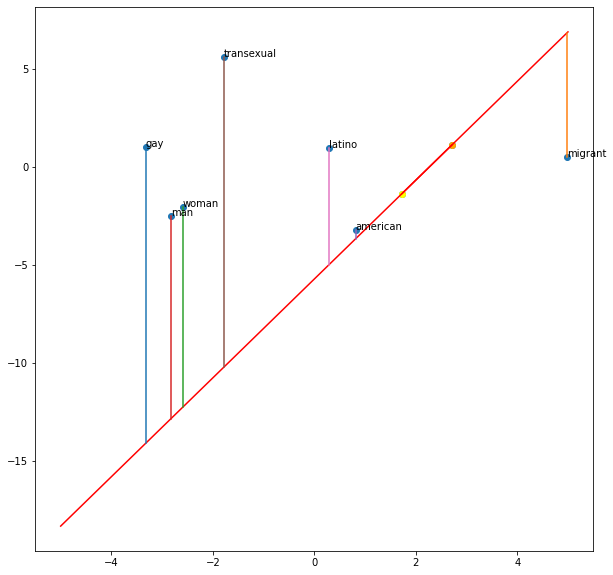

In [ ]:
#Adjust size of plot
plt.figure(figsize=(10,10))

#Plot words from list
plt.scatter(X_justice, Y_justice)

#Plot labels for words in list
for i, label in enumerate(words_justice):
    plt.annotate(label, (X_justice[i], Y_justice[i]))

#Plot small end of the scale
plt.scatter(x_justice, y_justice, color = 'yellow')

#Plot big end of the scale
plt.scatter(x_injustice, y_injustice, color = 'orange')

#Plot line connecting both ends
plt.plot([x_justice, x_injustice], [y_justice, y_injustice], color = 'red')


#Plot function connecting two points
X_data_justice, Y_data_justice = plotFunction(F_justice)
plt.plot(X_data_justice, Y_data_justice,  c ="red" )

#Plot differences between points and scale
for i in range(len(justice_2D)):
  plt.plot([X_justice[i], X_justice[i]], [Y_justice[i], Y_data_F_justice[i]] )


plt.savefig('justice_injustice_scale.png')
plt.show()

## Find scale vector from centroids

In [ ]:
# 1 Generate end vectors

small = glove(["small", "tiny", "little"])
big = glove(["big", "huge", "large"])

small_2D = performPCA(small, 2)
big_2D = performPCA(big, 2)

x_s, y_s = small_2D[0].T
x_t, y_t = small_2D[1].T
x_l, y_l = small_2D[2].T

x_b, y_b = small_2D[0].T
x_h, y_h = small_2D[1].T
x_large, y_large = big_2D[2].T



In [ ]:
# Find centroid of small end

x_avg_small = ((x_s + x_t + x_l) / 3)
y_avg_small = ((y_s + y_t + y_l) / 3)
 
small_centroid = [x_avg_small, y_avg_small]
 
small_centroid

# Find centroid of big end
x_avg_big = ((x_b + x_h + x_large) / 3)
y_avg_big = ((y_b + y_h + y_large) / 3)
 
big_centroid = [x_avg_big, y_avg_big]
 
big_centroid

[0.008830016474444443, -0.054265360059708535]

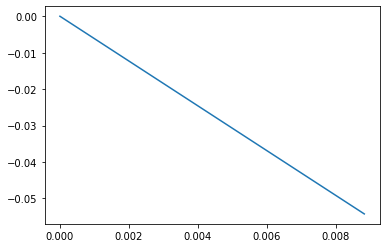

In [ ]:
#Plot line between centroids

x = (small_centroid[0], big_centroid[0])
y = (small_centroid[1], big_centroid[1])

plt.plot([small_centroid[0], big_centroid[0]], [small_centroid[1], big_centroid[1]])

Plot animals alongside SIZE scale

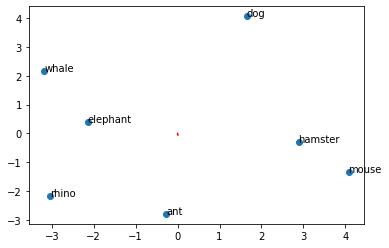

In [ ]:
animals = ["mouse", "hamster", "ant", "dog", "rhino", "elephant", "whale"]

PCA_animals = glove(animals)

#Perform PCA on list
animals_2D = performPCA(PCA_animals, 2)

x, y = animals_2D.T

plt.scatter(x, y)
plt.plot([small_centroid[0], big_centroid[0]], [small_centroid[1], big_centroid[1]], color = "red")

for i, label in enumerate(animals):
    plt.annotate(label, (x[i], y[i]))

plt.show()

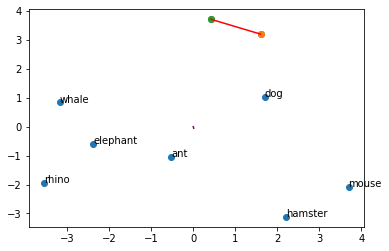

In [ ]:
'''
animals = ["mouse", "hamster", "ant", "dog", "rhino", "elephant", "whale"]
small_feature = get_end_vector(["small", "tiny", "little"])
big_feature = get_end_vector(["big", "huge", "large"])


PCA_animals = glove(animals)
PCA_animals.append(small_feature)
PCA_animals.append(big_feature)


#Perform PCA on list
animals_2D = performPCA(PCA_animals, 2)

x, y = animals_2D.T

x_s, y_s = animals_2D[7].T
x_b, y_b = animals_2D[8].T


plt.scatter(x, y)
plt.plot([small_centroid[0], big_centroid[0]], [small_centroid[1], big_centroid[1]], color = "purple")
for i, label in enumerate(animals):
    plt.annotate(label, (x[i], y[i]))

plt.scatter(x_s, y_s)
plt.scatter(x_b, y_b)
plt.plot([x_s, x_b], [y_s, y_b], color = 'red')

plt.show()
'''

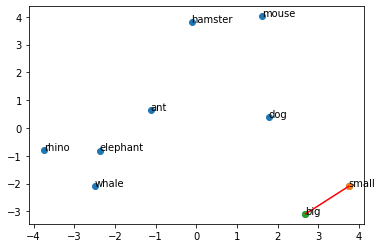

In [ ]:
animals = ["mouse", "hamster", "ant", "dog", "rhino", "elephant", "whale", "small", "big"]


PCA_animals = glove(animals)


#Perform PCA on list
animals_2D = performPCA(PCA_animals, 2)

x, y = animals_2D.T

x_s, y_s = animals_2D[7].T
x_b, y_b = animals_2D[8].T


plt.scatter(x, y)

for i, label in enumerate(animals):
    plt.annotate(label, (x[i], y[i]))

plt.scatter(x_s, y_s)
plt.scatter(x_b, y_b)
plt.plot([x_s, x_b], [y_s, y_b], color = 'red')

plt.show()

https://plotly.com/python/3d-scatter-plots/


In [ ]:
import plotly.graph_objects as go
import numpy as np

animals = ["mouse", "hamster", "ant", "dog", "rhino", "elephant", "whale", "small", "big"]


PCA_animals = glove(animals)


#Perform PCA on list
animals_2D = performPCA(PCA_animals, 3)

x, y, z = animals_2D.T

# Helix equation
t = np.linspace(0, 10, 50)


data=go.Scatter3d(x=x, y=y, z=z, mode='markers+text', text = ["mouse", "hamster", "ant", "dog", "rhino", "elephant", "whale", "small", "big"])
fig = go.Figure(data = data)

fig.show()

Por hacer:
* Lollipops
* Sumas
* Heat maps


# Lollipops

### Projection scores for compound words

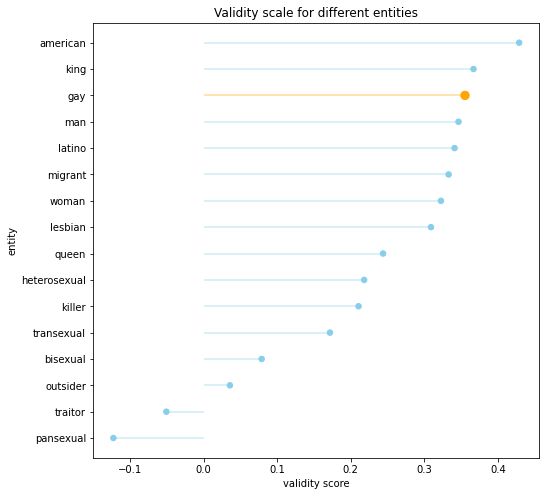

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Data frame must contain word and its respective value in the scale.
# First we need to define the scale vector. For that we are going to use the Generate_feature_vector() function.

# Now we need a function that projects words onto feature subspace. 

words = ["gay", "migrant", "woman", "man", "american", "transexual", "latino", "king", "queen", "traitor", "killer", "outsider", "heterosexual", "lesbian", "bisexual", "pansexual"]
b =  ["good", "valid", "legal"]
a = ["bad", "odd", "opression"] 

word_rankings = get_scores(words, a , b)

words_and_projections = zip(words,word_rankings)

# Create a pandas data frame
df = pd.DataFrame(words_and_projections, columns = ["word", "score"])

# Sort data frame from lowest to highest
ordered_df = df.sort_values(by='score')
my_range=range(1,len(df.index)+1)

# For vertical plot
'''
# For vertical plot
plt.stem(ordered_df['score'])
plt.xticks( my_range, ordered_df['word'])
plt.show()
'''
# For horizontal plot:

# The horizontal plot is made using the hline function

my_color=np.where(ordered_df['word']=='gay' , 'orange', 'skyblue')
my_size=np.where(ordered_df['word']=='gay', 70, 30)

plt.figure(figsize=(8,8))
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['score'], color=my_color, alpha=0.4)
plt.scatter(ordered_df['score'], my_range, color=my_color, s=my_size, alpha=1)
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['word'])
plt.title("Validity scale for different entities", loc='center')
plt.xlabel('validity score')
plt.ylabel('entity')

# Show the plot
plt.savefig('justice_injustice_lollipops')
plt.show()



In [ ]:
a = ["small", "little", "tiny"]
b =  ["big", "huge", "large"]
word_labels = ["small dog", "big dog"]
#LollipopsWordSum(types_of_dogs, word_labels, a, b, "types of dogs", "size score")

# Vector addition lollipops


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def LollipopsWordSum(words, word_label, a, b, title, x_axis):
  
  word_rankings = GetScoreSum(words, a , b)
  words_and_projections = zip(word_label,word_rankings)
    
  # Create a pandas data frame
  df = pd.DataFrame(words_and_projections, columns = ["word", "score"])

  # Sort data frame from lowest to highest
  ordered_df = df.sort_values(by='score')
  my_range=range(1,len(df.index)+1)

  # For vertical plot
  '''
  # For vertical plot
  plt.stem(ordered_df['score'])
  plt.xticks( my_range, ordered_df['word'])
  plt.show()
  '''
  # For horizontal plot:

  # The horizontal plot is made using the hline function

  my_color=np.where(ordered_df['word']=='gay' , 'orange', 'skyblue')
  my_size=np.where(ordered_df['word']=='gay', 70, 30)

  plt.figure(figsize=(8,8))
  plt.hlines(y=my_range, xmin=0, xmax=ordered_df['score'], color=my_color, alpha=0.4)
  plt.scatter(ordered_df['score'], my_range, color=my_color, s=my_size, alpha=1)
  
  # Add titles and axis names
  plt.yticks(my_range, ordered_df['word'])
  plt.title(title, loc='center')
  plt.xlabel(x_axis)
  plt.ylabel('entity')

  # Show the plot
  plt.savefig('justice_injustice_lollipops')
  plt.show()


Lollipop for women


In [ ]:
def LollipopsWordSumComparison(wordset1, wordset2, word_label, a, b, title, x_axis):
  
  # For word set 1:
  word_rankings1 = GetScoreSum(wordset1, a , b)
  words_and_projections1 = zip(word_label,word_rankings1)

  # For wordset 2:
  word_rankings2 = GetScoreSum(wordset2, a , b)
  words_and_projections2 = zip(word_label,word_rankings2)  
  word_rankings_1_2 = zip(word_label, word_rankings1, word_rankings2)

  # Create a pandas data frame
  df3 = pd.DataFrame(word_rankings_1_2, columns = ["word", "score1", "score2"])

  # Sort data frame from lowest to highest
  my_range=range(1,len(df3.index)+1)
  ordered_df3 = df3.sort_values(by = 'score2' )

  # The horizontal plot is made using the hline function
  plt.hlines(y=my_range, xmin=ordered_df3['score2'], xmax=ordered_df3['score1'], color='grey', alpha=0.4)
  plt.scatter(ordered_df3['score1'], my_range, color='skyblue', alpha=1, label='score1 (woman)')
  plt.scatter(ordered_df3['score2'], my_range, color='green', alpha=0.4 , label='score2 (man)')
  plt.legend()

  # Add titles and axis names
  plt.yticks(my_range, ordered_df3['word'])
  plt.title("Comparison of the value 1 and the value 2", loc='left')
  plt.xlabel('Value of the variables')
  plt.ylabel('Group')

  # Show the plot
  plt.show()

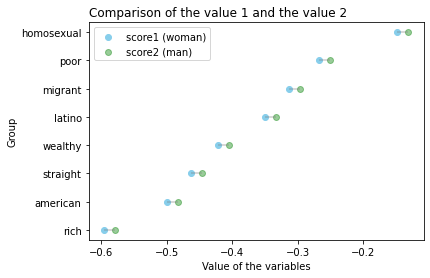

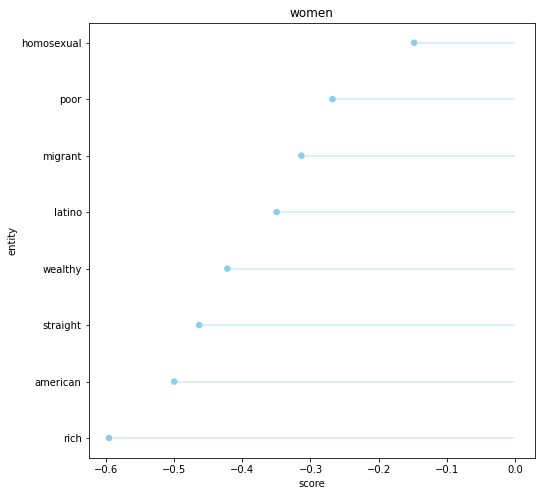

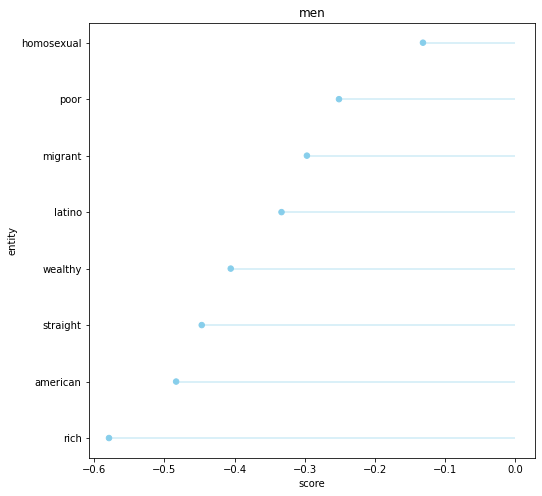

In [ ]:
# 1. Compute vector addition list.
women = VectorAdditionList(["woman"], ["american", "rich", "wealthy", "straight", "poor", "latino", "migrant", "homosexual" ])
men = VectorAdditionList (["man"], ["american", "rich", "wealthy", "straight", "poor", "latino", "migrant", "homosexual" ])

# 2. define a side of the scale.
a = ["refined", "important", "pretty"]
b = ["irrelevant", "ugly", "gross"]

# 3. define labels for the lollipop
labels = ["american", "rich", "wealthy", "straight", "poor", "latino", "migrant", "homosexual" ]

# 4. Compute Lollipop

LollipopsWordSumComparison(women, men, labels, a, b, "women", "score")
LollipopsWordSum(women, labels, a, b, "women", "score")
LollipopsWordSum(men, labels, a, b, "men", "score")